In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [61]:
iris = datasets.load_iris()
# df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df['target'] = iris.target

In [62]:
df = pd.DataFrame({'Sepal length': iris.data[:, 0],
                   'Sepal width': iris.data[:, 1],
                   'Petal length': iris.data[:, 2],
                   'Petal width': iris.data[:, 3],
                   'Species': iris.target})
df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
df = df[df['Species'] != 0]

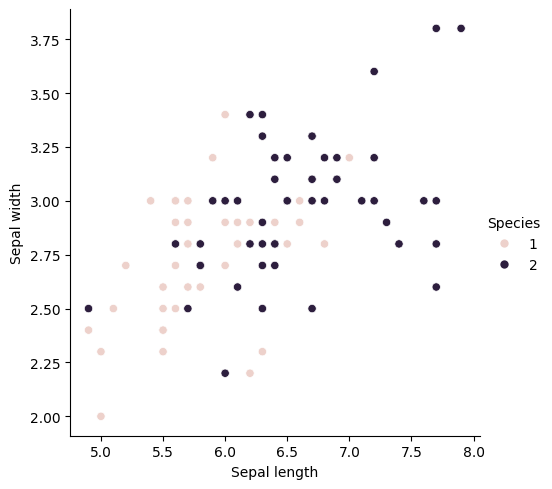

In [64]:
#Visualize
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species', aspect = 1)

In [65]:
# train-test split
from sklearn.model_selection import train_test_split

x = df[df.columns[0:4]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
X_train[:5]

,Sepal length,Sepal width,Petal length,Petal width
147,6.5,3.0,5.2,2.0
87,6.3,2.3,4.4,1.3
97,6.2,2.9,4.3,1.3
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2


In [67]:
from sklearn.naive_bayes import GaussianNB

classfier = GaussianNB()
classfier.fit(X_train, y_train)

y_pred = classfier.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


result = confusion_matrix(y_test, y_pred)
result



array([[ 9,  0],
       [ 1, 10]], dtype=int64)

In [69]:
result1 = classification_report(y_test, y_pred)
result1

'              precision    recall  f1-score   support\n\n           1       0.90      1.00      0.95         9\n           2       1.00      0.91      0.95        11\n\n    accuracy                           0.95        20\n   macro avg       0.95      0.95      0.95        20\nweighted avg       0.96      0.95      0.95        20\n'

In [70]:
result2 = accuracy_score(y_test, y_pred)
result2

0.95

In [71]:
df1 = pd.DataFrame({'Sepal length': iris.data[:, 0],
                   'Sepal width': iris.data[:, 1],
                   'Petal length': iris.data[:, 2],
                   'Petal width': iris.data[:, 3],
                   'Species': iris.target})
df1

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [72]:
# Multiple class Naive Bayes
from sklearn.naive_bayes import MultinomialNB


x1 = df1[df1.columns[0:4]]
y1 = df1[df1.columns[-1]]

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

In [73]:
classfier1 = GaussianNB()
classfier1.fit(X1_train, y1_train)

GaussianNB()

In [74]:
y1_pred = classfier1.predict(X1_test)

result3 = confusion_matrix(y1_test, y1_pred)
result3


array([[ 8,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 15]], dtype=int64)

In [79]:
# Train a model
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# classifier = LogisticRegression()
classifier = LogisticRegression(solver='liblinear', multi_class='ovr')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result4 = confusion_matrix(y_test, y_pred)
display(result4)

result5 = classification_report(y_test, y_pred)
display(result5)

result6 = accuracy_score(y_test, y_pred)
display(result6)

c:\Users\K3n\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([[ 9,  0],
       [ 0, 11]], dtype=int64)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

1.0

In [82]:
# Train a model (SVM)
from sklearn.svm import SVC

classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result7 = confusion_matrix(y_test, y_pred)
display(result7)

result8 = classification_report(y_test, y_pred)
display(result8)

result9 = accuracy_score(y_test, y_pred)
display(result9)


array([[ 9,  0],
       [ 0, 11]], dtype=int64)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

1.0

In [83]:
# Train a model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result10 = confusion_matrix(y_test, y_pred)
display(result10)

result11 = classification_report(y_test, y_pred)
display(result11)

result12 = accuracy_score(y_test, y_pred)
display(result12)

result13 = precision_score(y_test, y_pred, average='macro')
display(result13)

array([[ 9,  0],
       [ 1, 10]], dtype=int64)

'              precision    recall  f1-score   support\n\n           1       0.90      1.00      0.95         9\n           2       1.00      0.91      0.95        11\n\n    accuracy                           0.95        20\n   macro avg       0.95      0.95      0.95        20\nweighted avg       0.96      0.95      0.95        20\n'

0.95

0.95